# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
from MCForecastTools import MCSimulation

%matplotlib inline
import alpaca_trade_api as tradeapi



In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

# YOUR CODE HERE!

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_url= btc_url + "?format=json"
eth_url= eth_url + "?format=json"
requests.get(btc_url)
requests.get(eth_url)

<Response [200]>

In [6]:
# Fetch current ETH price
response_eth = requests.get(eth_url).json()
#response_content = response_eth.content
#data_eth = response_eth.json()
print(json.dumps(response_eth , indent = 4) )
print("-----------------")
response_btc = requests.get(btc_url).json()

print(json.dumps(response_btc , indent = 4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 116104471,
            "total_supply": 116104471,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 2657.25,
                    "volume_24h": 43017543050,
                    "market_cap": 308194552084,
                    "percentage_change_1h": 1.40597256005739,
                    "percentage_change_24h": 9.20921172728768,
                    "percentage_change_7d": 25.3395818557992,
                    "percent_change_1h": 1.40597256005739,
                    "percent_change_24h": 9.20921172728768,
                    "percent_change_7d": 25.3395818557992
                }
            },
            "last_updated": 1622500088
        }
    },
    "metadata": {
        "timestamp": 1622500088,
        "num_crypto

In [7]:
my_btc_value = response_btc["data"]["1"]["quotes"]["USD"]["price"]*my_btc
print(my_btc_value)
my_eth_value = response_eth["data"]["1027"]["quotes"]["USD"]["price"]*my_eth
print(my_eth_value)

44677.2
14083.425


In [8]:
# Compute current value of my crpto


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $44677.20
The current value of your 5.3 ETH is $14083.42


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [10]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")


In [11]:
# Format current date as ISO format
timeframe = "1D"
start_date = pd.Timestamp("2020-05-28",tz="America/New_york").isoformat()
end_date = pd.Timestamp("2020-05-28",tz="America/New_york").isoformat()


In [12]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_ticker = api.get_barset(
            tickers,
            timeframe,
            start = start_date,
            end = end_date,
            
).df

# Preview DataFrame
df_ticker

AGG                                       SPY  \
                             open    high     low   close    volume    open   
time                                                                          
2020-05-28 00:00:00-04:00  117.14  117.35  112.24  117.33  18488400  304.65   

                                                              
                             high     low   close     volume  
time                                                          
2020-05-28 00:00:00-04:00  306.84  302.24  302.96  159401239

In [13]:
# Pick AGG and SPY close prices
df_closing_prices = pd.DataFrame()
agg_close_price = float(df_ticker["AGG"]["close"])
spy_close_price = float(df_ticker["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.33
Current SPY closing price: $302.96


In [14]:
# Compute the current value of shares
my_spy_value = spy_close_price*my_spy
my_agg_value = agg_close_price*my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $15148.00
The current value of your 200 AGG shares is $23466.00


### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income = 12000
df_savings = pd.DataFrame()
# Create savings DataFrame
df_savings["amount"] = [(my_spy_value+my_agg_value),(my_btc_value+my_eth_value)]
df_savings.index = ['Shares',"Crypto"]
# Display savings DataFrame
display(df_savings)

,amount
Shares,38614.000
Crypto,58760.625


array([<AxesSubplot:ylabel='amount'>], dtype=object)

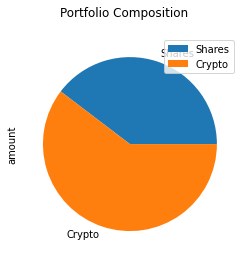

In [16]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True,title="Portfolio Composition")

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_saving = my_spy_value+my_agg_value + my_btc_value+my_eth_value


# Validate saving health
if total_saving > emergency_fund:
    print(f"congratulating the person for having enough money in this fund.")
elif total_saving == emergency_fund:
    print(f"congratulating the person on reaching this financial goal.")
else:
    print(f"{emergency_fund - total_saving} dollars away the person is from reaching the goal.") 

congratulating the person for having enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-03-28', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-03-28', tz='America/New_York').isoformat()
print(start_date)
print(end_date)

2015-03-28T00:00:00-04:00
2020-03-28T00:00:00-04:00


In [19]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_stock_data = api.get_barset(
                tickers,
                timeframe,
                start = start_date,
                end = end_date,
            
).df

# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open    high      low    close   volume    open   
time                                                                           
2019-11-04 00:00:00-05:00  112.71  112.72  112.590  112.630  2405029  307.85   
2019-11-05 00:00:00-05:00  112.35  112.38  112.150  112.250  2436159  307.59   
2019-11-06 00:00:00-05:00  112.40  112.51  112.260  112.410  3546180  307.03   
2019-11-07 00:00:00-05:00  112.12  112.12  111.635  111.875  3600593  308.57   
2019-11-08 00:00:00-05:00  111.87  112.10  111.810  111.820  2504420  307.80   

                                                               
                               high     low   close    volume  
time                                                           
2019-11-04 00:00:00-05:00  308.0000  306.96  307.34  52897810  
2019-11-05 00:00:00-05:00  307.9195  306.71  307.00  37677568  
2019-11-06 00:00:00-05:00  307.4000  306.06  307.14  38740895  
2019-11-07 00:00:00-05:00  309.6500  307.66  308.22  48824013  
2019-11-08 00:00:00-05:00  308.9700  307.03  308.97  39113878

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
                portfolio_data = df_stock_data ,
                weights= [0.40,0.60],
                num_simulation=500,
                num_trading_days=252*30
)

In [21]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                     \
                             open    high      low    close   volume   
time                                                                   
2019-11-04 00:00:00-05:00  112.71  112.72  112.590  112.630  2405029   
2019-11-05 00:00:00-05:00  112.35  112.38  112.150  112.250  2436159   
2019-11-06 00:00:00-05:00  112.40  112.51  112.260  112.410  3546180   
2019-11-07 00:00:00-05:00  112.12  112.12  111.635  111.875  3600593   
2019-11-08 00:00:00-05:00  111.87  112.10  111.810  111.820  2504420   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2019-11-04 00:00:00-05:00          NaN  307.85  308.0000  306.96  307.34   
2019-11-05 00:00:00-05:00    -0.003374  307.59  307.9195  306.71  307.00   
2019-11-06 00:00:00-05:00     0.001425  307.03  307.4000  306.06  307.14   
2019-11-07 00:00:00-05:00    -0.004759  308.57  309.6500  307.66  308.22   
2019-11-08 00:00:00-05:00    -0.000492  307.80  308.9700  307.03  308.97   

                                                  
                             volume daily_return  
time                                              
2019-11-04 00:00:00-05:00  52897810          NaN  
2019-11-05 00:00:00-05:00  37677568    -0.001106  
2019-11-06 00:00:00-05:00  38740895     0.000456  
2019-11-07 00:00:00-05:00  48824013     0.003516  
2019-11-08 00:00:00-05:00  39113878     0.002433

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994366,1.019555,0.998932,1.007871,1.002998,0.978379,1.014706,0.997163,1.022179,1.001614,...,0.984383,1.023215,1.004004,1.020443,0.993908,0.962366,0.991263,1.002090,1.003221,0.983523
2,0.988664,1.009412,1.015402,0.990158,1.004015,0.962115,1.007726,1.021025,1.037639,1.018175,...,0.943943,1.022172,0.983941,1.029660,1.001953,0.934449,0.983957,0.995154,0.993958,0.993502
3,0.973062,1.027290,1.043742,1.006631,1.014493,0.980012,1.019419,1.056161,1.029433,1.035933,...,0.950645,0.997903,0.984677,1.056561,1.004847,0.932378,1.016140,1.007617,0.989204,0.993564
4,1.009892,1.029296,1.031845,1.026478,1.020740,0.976826,1.016347,1.066092,1.064749,1.052531,...,0.957249,1.008510,0.966478,1.033699,0.968246,0.920282,1.030251,1.020074,0.994789,1.042596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,0.008538,0.001767,0.033385,0.000885,0.006044,0.000839,0.000360,0.021866,0.000984,0.000149,...,0.000778,0.011504,0.000213,0.063297,0.000407,0.003412,0.000754,0.001717,0.001217,0.000291
7557,0.008657,0.001721,0.033656,0.000856,0.006008,0.000825,0.000355,0.022213,0.001006,0.000145,...,0.000773,0.011252,0.000214,0.063561,0.000417,0.003350,0.000748,0.001708,0.001187,0.000283
7558,0.008710,0.001678,0.033210,0.000850,0.006046,0.000831,0.000357,0.022453,0.001020,0.000148,...,0.000790,0.011431,0.000214,0.062206,0.000418,0.003318,0.000747,0.001727,0.001217,0.000286
7559,0.008697,0.001701,0.033734,0.000838,0.005960,0.000856,0.000366,0.022661,0.001027,0.000147,...,0.000804,0.011420,0.000219,0.062192,0.000421,0.003184,0.000733,0.001726,0.001245,0.000290


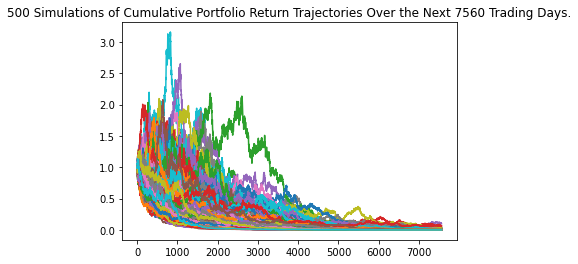

In [23]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

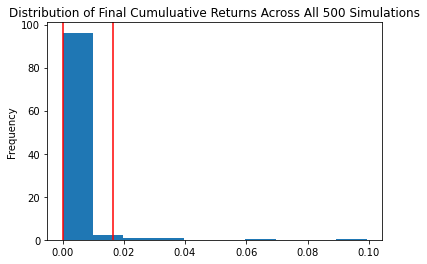

In [24]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()
# Print summary statistics
print(tbl)

count           500.000000
mean              0.002494
std               0.007208
min               0.000004
25%               0.000238
50%               0.000739
75%               0.001830
max               0.099387
95% CI Lower      0.000036
95% CI Upper      0.016371
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [33]:
# Set initial investment
initial_investment = 20000
simulated_returns_data = {
    "mean": list(MC_thirtyyear.simulated_return.mean(axis=1)),
    "median": list(MC_thirtyyear.simulated_return.median(axis=1)),
    "min": list(MC_thirtyyear.simulated_return.min(axis=1)),
    "max": list(MC_thirtyyear.simulated_return.max(axis=1))
}
df_simulated_returns = pd.DataFrame(simulated_returns_data)
cumulative_pnl = initial_investment*df_simulated_returns

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $0.72 and $327.41


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [34]:
# Set initial investment
initial_investment = 20000 * 1.5
simulated_returns_data = {
    "mean": list(MC_thirtyyear.simulated_return.mean(axis=1)),
    "median": list(MC_thirtyyear.simulated_return.median(axis=1)),
    "min": list(MC_thirtyyear.simulated_return.min(axis=1)),
    "max": list(MC_thirtyyear.simulated_return.max(axis=1))
}
df_simulated_returns = pd.DataFrame(simulated_returns_data)
cumulative_pnl = initial_investment*df_simulated_returns
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $1.08 and $491.12


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [35]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
                portfolio_data = df_stock_data ,
                weights= [0.40,0.60],
                num_simulation=500,
                num_trading_days=252*5
)
MC_fiveyear.portfolio_data.head()

AGG                                     \
                             open    high      low    close   volume   
time                                                                   
2019-11-04 00:00:00-05:00  112.71  112.72  112.590  112.630  2405029   
2019-11-05 00:00:00-05:00  112.35  112.38  112.150  112.250  2436159   
2019-11-06 00:00:00-05:00  112.40  112.51  112.260  112.410  3546180   
2019-11-07 00:00:00-05:00  112.12  112.12  111.635  111.875  3600593   
2019-11-08 00:00:00-05:00  111.87  112.10  111.810  111.820  2504420   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2019-11-04 00:00:00-05:00          NaN  307.85  308.0000  306.96  307.34   
2019-11-05 00:00:00-05:00    -0.003374  307.59  307.9195  306.71  307.00   
2019-11-06 00:00:00-05:00     0.001425  307.03  307.4000  306.06  307.14   
2019-11-07 00:00:00-05:00    -0.004759  308.57  309.6500  307.66  308.22   
2019-11-08 00:00:00-05:00    -0.000492  307.80  308.9700  307.03  308.97   

                                                  
                             volume daily_return  
time                                              
2019-11-04 00:00:00-05:00  52897810          NaN  
2019-11-05 00:00:00-05:00  37677568    -0.001106  
2019-11-06 00:00:00-05:00  38740895     0.000456  
2019-11-07 00:00:00-05:00  48824013     0.003516  
2019-11-08 00:00:00-05:00  39113878     0.002433

In [36]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012351,0.983554,0.985227,1.010253,0.986810,1.007780,0.972807,0.996687,0.966564,0.972342,...,0.979264,1.008610,1.010848,1.022887,0.986160,0.980962,0.980460,0.997010,1.010782,0.986515
2,1.020680,0.991524,0.958091,1.031162,0.979810,1.028084,0.997440,0.963860,0.992415,0.997944,...,0.972033,1.015652,1.015199,1.027592,0.984579,1.002995,0.968648,0.998730,1.003941,0.978697
3,1.023345,0.968416,0.929785,1.016693,1.005536,1.047094,0.977296,0.958075,0.967897,0.952848,...,1.002711,1.000086,1.021855,1.026219,0.958824,0.978659,0.966021,1.015538,1.018930,0.992413
4,1.027871,0.947460,0.942611,1.026285,1.000360,1.051944,0.985676,0.950643,0.951722,0.937650,...,0.997845,1.011827,1.012896,1.013119,0.957622,0.976900,0.983675,1.018017,1.027756,1.016524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.385405,0.563567,0.665840,0.115219,0.139842,0.184831,0.215398,0.381551,0.324807,0.215275,...,0.357530,0.359419,0.148651,0.221807,0.553016,0.284395,0.150686,0.368891,1.047118,0.440631
1257,0.390693,0.558460,0.656149,0.113417,0.134175,0.184285,0.218893,0.371166,0.330952,0.211078,...,0.349494,0.347477,0.148622,0.220785,0.555095,0.284000,0.148426,0.369812,1.006239,0.437423
1258,0.389240,0.537617,0.685265,0.113174,0.134748,0.180412,0.219667,0.373378,0.331462,0.215976,...,0.346857,0.343549,0.149677,0.218655,0.553078,0.277112,0.147773,0.365268,1.026515,0.444337
1259,0.391353,0.522658,0.693019,0.110653,0.136362,0.180089,0.221206,0.374958,0.320136,0.214008,...,0.341186,0.342697,0.152940,0.215937,0.572129,0.274027,0.144789,0.345510,1.035145,0.431020


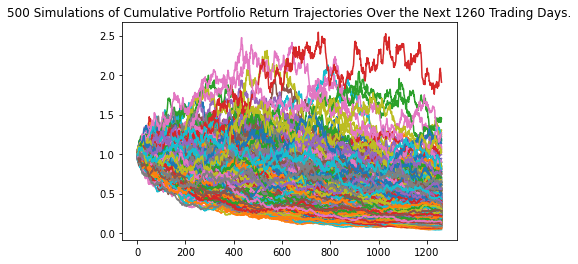

In [37]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

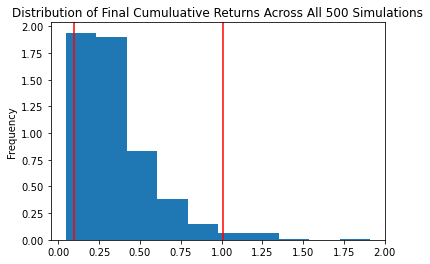

In [38]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              0.355759
std               0.236679
min               0.045011
25%               0.199926
50%               0.288610
75%               0.443694
max               1.909891
95% CI Lower      0.095007
95% CI Upper      1.009638
Name: 1260, dtype: float64


In [40]:
# Set initial investment

initial_investment = 20000
simulated_returns_data = {
    "mean": list(MC_fiveyear.simulated_return.mean(axis=1)),
    "median": list(MC_fiveyear.simulated_return.median(axis=1)),
    "min": list(MC_fiveyear.simulated_return.min(axis=1)),
    "max": list(MC_fiveyear.simulated_return.max(axis=1))
}
df_simulated_returns = pd.DataFrame(simulated_returns_data)
cumulative_pnl = initial_investment*df_simulated_returns
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $1900.14 and $20192.77


### Ten Years Retirement Option

In [41]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
                portfolio_data = df_stock_data ,
                weights= [0.40,0.60],
                num_simulation=500,
                num_trading_days=252*10
)
MC_fiveyear.portfolio_data.head()

AGG                                     \
                             open    high      low    close   volume   
time                                                                   
2019-11-04 00:00:00-05:00  112.71  112.72  112.590  112.630  2405029   
2019-11-05 00:00:00-05:00  112.35  112.38  112.150  112.250  2436159   
2019-11-06 00:00:00-05:00  112.40  112.51  112.260  112.410  3546180   
2019-11-07 00:00:00-05:00  112.12  112.12  111.635  111.875  3600593   
2019-11-08 00:00:00-05:00  111.87  112.10  111.810  111.820  2504420   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2019-11-04 00:00:00-05:00          NaN  307.85  308.0000  306.96  307.34   
2019-11-05 00:00:00-05:00    -0.003374  307.59  307.9195  306.71  307.00   
2019-11-06 00:00:00-05:00     0.001425  307.03  307.4000  306.06  307.14   
2019-11-07 00:00:00-05:00    -0.004759  308.57  309.6500  307.66  308.22   
2019-11-08 00:00:00-05:00    -0.000492  307.80  308.9700  307.03  308.97   

                                                  
                             volume daily_return  
time                                              
2019-11-04 00:00:00-05:00  52897810          NaN  
2019-11-05 00:00:00-05:00  37677568    -0.001106  
2019-11-06 00:00:00-05:00  38740895     0.000456  
2019-11-07 00:00:00-05:00  48824013     0.003516  
2019-11-08 00:00:00-05:00  39113878     0.002433

In [42]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985279,0.965707,1.017230,0.980828,0.995881,1.003849,0.983269,1.022940,1.000850,1.013642,...,1.008170,0.996519,1.000318,1.010068,0.982449,0.982791,0.984773,0.996648,0.985900,0.974211
2,0.988028,0.966387,1.023196,0.954001,1.010868,1.015163,0.990538,1.011273,1.000734,1.018547,...,0.995439,0.997636,0.989686,1.040150,0.974530,0.972293,0.986216,0.998189,0.988691,0.992635
3,0.983849,0.989423,1.007545,0.954195,1.048698,0.997625,0.975368,1.030487,0.999735,1.007613,...,0.987077,1.001438,0.995863,1.013252,0.955825,0.962262,1.002044,0.978868,1.011308,0.961993
4,1.013647,1.019436,0.990810,0.952421,1.050228,0.980255,0.957727,1.042606,0.986550,0.990630,...,0.992960,1.033717,0.994060,1.022444,0.958585,0.974937,0.993134,0.960368,1.001732,0.962781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.045504,0.153615,0.046720,0.124304,0.131712,0.040109,0.179556,0.128862,0.007161,0.240502,...,0.114680,0.199998,0.239837,0.048362,0.135883,0.153802,0.598570,0.164552,0.242470,0.045087
2517,0.045854,0.158160,0.046235,0.125769,0.136678,0.040336,0.179258,0.126328,0.007276,0.242399,...,0.117288,0.203695,0.236933,0.048320,0.134699,0.154664,0.599549,0.169845,0.238353,0.045651
2518,0.047854,0.162622,0.045750,0.123230,0.138446,0.042177,0.175462,0.129592,0.007420,0.245745,...,0.115954,0.206122,0.238948,0.047578,0.139229,0.155111,0.601319,0.171483,0.243178,0.045645
2519,0.047427,0.158272,0.045208,0.126278,0.137713,0.041041,0.172734,0.132657,0.007513,0.242976,...,0.116073,0.208595,0.244107,0.048186,0.132818,0.158727,0.598974,0.170577,0.240786,0.045252


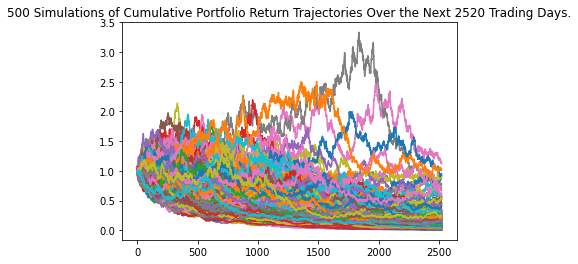

In [43]:
# Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()

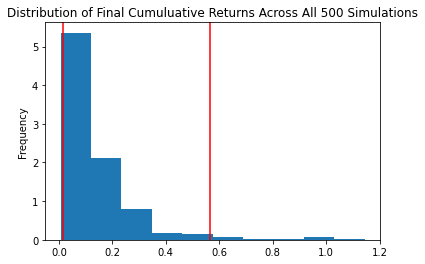

In [44]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()

In [45]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              0.137595
std               0.149205
min               0.006050
25%               0.049376
50%               0.089022
75%               0.170361
max               1.144628
95% CI Lower      0.014654
95% CI Upper      0.566892
Name: 2520, dtype: float64


In [48]:
# Set initial investment
initial_investment = 20000
simulated_returns_data = {
    "mean": list(MC_tenyear.simulated_return.mean(axis=1)),
    "median": list(MC_tenyear.simulated_return.median(axis=1)),
    "min": list(MC_tenyear.simulated_return.min(axis=1)),
    "max": list(MC_tenyear.simulated_return.max(axis=1))
}
df_simulated_returns = pd.DataFrame(simulated_returns_data)
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,0.999282,1.000375,0.951170,1.049469
2,0.999859,1.001678,0.914711,1.079217
3,0.999319,0.998909,0.916572,1.096333
4,0.997619,0.998018,0.907857,1.102398


In [49]:
cumulative_pnl = initial_investment*df_simulated_returns
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $293.07 and $11337.84
